2721954


<Axes: >

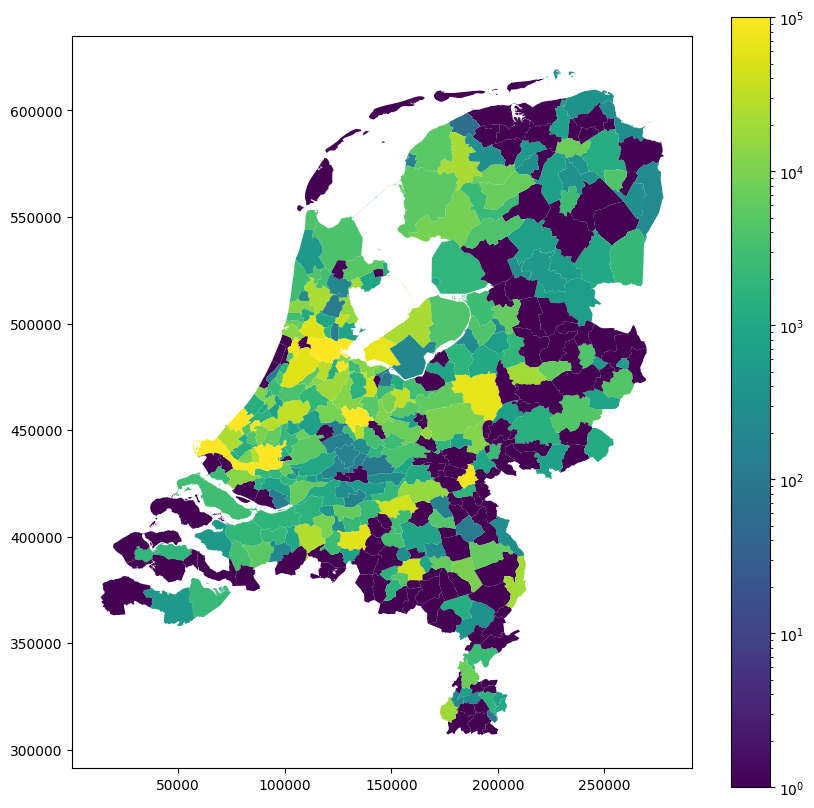

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os

seed = 4
run = 3

path = os.getcwd() + '/Data/Model_V1/Data/High/Seed_' + str(seed)
contact_data = np.load(path + '/Runs_ref_3_3_5/Contacts_' + str(run) + '.npy')
contact_data_per_municipality = np.sum(contact_data, axis=1) + 1

contacts = np.sum(contact_data_per_municipality)
print(contacts)

mapdf = gpd.read_file('Data/NL-geomap/gemeente_2018_v3.shp')
mapdf = mapdf[mapdf["H2O"] == "NEE"]
mapdf.sort_values("GM_NAAM", inplace=True)
mapdf = mapdf.reset_index(drop=True)

mapdf.insert(0, 'CONTACTS', contact_data_per_municipality)
#pd.set_option('display.max_rows', None)
#print(mapdf)

mapdf.plot(column="CONTACTS", figsize=(10,10), legend=True, norm=matplotlib.colors.LogNorm(1,100000))